In [120]:
!pip install Quandl

import pandas as pd
import quandl,datetime
import math
import numpy as np
from sklearn import preprocessing #scale, regresions, cross shuffle stats sepeareate data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import cross_val_score
import sklearn
svc = sklearn.svm.SVC()
from sklearn.svm import SVC
svc = SVC()
sklearn.__version__



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


'1.0.2'

In [88]:
style.use('ggplot')

In [89]:

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400


In [90]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5531,2021-12-27,177.089996,180.419998,177.070007,180.330002,179.586868,74919600
5532,2021-12-28,180.160004,181.330002,178.529999,179.289993,178.551132,79144300
5533,2021-12-29,179.330002,180.630005,178.139999,179.380005,178.640778,62348900
5534,2021-12-30,179.470001,180.570007,178.089996,178.199997,177.465637,59773000
5535,2021-12-31,178.089996,179.229996,177.259995,177.570007,176.838242,64062300


In [91]:
#print(df.index)
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400
...,...,...,...,...,...,...,...
5531,2021-12-27,177.089996,180.419998,177.070007,180.330002,179.586868,74919600
5532,2021-12-28,180.160004,181.330002,178.529999,179.289993,178.551132,79144300
5533,2021-12-29,179.330002,180.630005,178.139999,179.380005,178.640778,62348900
5534,2021-12-30,179.470001,180.570007,178.089996,178.199997,177.465637,59773000


In [92]:
df['High_Low_per'] = (df['High'] - df['Close']) / df['Close']*100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High_Low_per
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800,0.502480
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600,7.926755
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600,6.310126
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800,12.631600
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400,1.507554


In [93]:
df['Per_change'] = (df['Open'] - df['Open']) / df['Close']*100
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,High_Low_per,Per_change
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800,0.502480,0.0
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600,7.926755,0.0
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600,6.310126,0.0
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800,12.631600,0.0
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400,1.507554,0.0


In [94]:
df = df[['Adj Close','High_Low_per','Per_change','Volume']]
df.head()

,Adj Close,High_Low_per,Per_change,Volume
0,0.853355,0.502480,0.0,535796800
1,0.781409,7.926755,0.0,512377600
2,0.792844,6.310126,0.0,778321600
3,0.724232,12.631600,0.0,767972800
4,0.758538,1.507554,0.0,460734400


In [95]:
label_col = 'Adj Close'
df.head()

,Adj Close,High_Low_per,Per_change,Volume
0,0.853355,0.502480,0.0,535796800
1,0.781409,7.926755,0.0,512377600
2,0.792844,6.310126,0.0,778321600
3,0.724232,12.631600,0.0,767972800
4,0.758538,1.507554,0.0,460734400


In [96]:
forecast_ceil = int(math.ceil(0.001*len(df)))
#math.ceil rounds to the top
df.head()

,Adj Close,High_Low_per,Per_change,Volume
0,0.853355,0.502480,0.0,535796800
1,0.781409,7.926755,0.0,512377600
2,0.792844,6.310126,0.0,778321600
3,0.724232,12.631600,0.0,767972800
4,0.758538,1.507554,0.0,460734400


In [97]:
df['label'] = df[label_col].shift(-forecast_ceil)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Adj Close,High_Low_per,Per_change,Volume,label
0,0.853355,0.502480,0.0,535796800,0.707080
1,0.781409,7.926755,0.0,512377600,0.664674
2,0.792844,6.310126,0.0,778321600,0.737573
3,0.724232,12.631600,0.0,767972800,0.765685
4,0.758538,1.507554,0.0,460734400,0.792367


In [98]:
#df.dropna(inplace=True)
#print(df.head())

In [99]:
#feaures X, labels Y
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:] #no y value
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


,Adj Close,High_Low_per,Per_change,Volume,label
0,0.853355,0.502480,0.0,535796800,0.707080
1,0.781409,7.926755,0.0,512377600,0.664674
2,0.792844,6.310126,0.0,778321600,0.737573
3,0.724232,12.631600,0.0,767972800,0.765685
4,0.758538,1.507554,0.0,460734400,0.792367


In [100]:
#X_lately
df.dropna(inplace=True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Adj Close,High_Low_per,Per_change,Volume,label
0,0.853355,0.502480,0.0,535796800,0.707080
1,0.781409,7.926755,0.0,512377600,0.664674
2,0.792844,6.310126,0.0,778321600,0.737573
3,0.724232,12.631600,0.0,767972800,0.765685
4,0.758538,1.507554,0.0,460734400,0.792367


In [101]:
#X = X[:-forecast_out+1]#all the points 
y = np.array(df['label'])
df.head()

,Adj Close,High_Low_per,Per_change,Volume,label
0,0.853355,0.502480,0.0,535796800,0.707080
1,0.781409,7.926755,0.0,512377600,0.664674
2,0.792844,6.310126,0.0,778321600,0.737573
3,0.724232,12.631600,0.0,767972800,0.765685
4,0.758538,1.507554,0.0,460734400,0.792367


In [102]:
len(X)

5530

In [103]:
len(y)

5530

In [134]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)



In [135]:
from sklearn import svm
clf = svm.SVR(kernel='rbf') #svm.SVR()

In [ ]:
#clf = LinearRegression(n_jobs =-1) to run as many jobs as possible for fast

In [136]:
clf.fit(X_train, y_train) #train

SVR()

In [137]:
accuracy = clf.score(X_test, y_test) #test Accuracy squared error for linreg

In [138]:
print(accuracy) #directionally accurate

0.9600974645742989


In [139]:
forecast_set = clf.predict(X_lately) #pass a single value or array

In [112]:
df['Forecast'] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#last_date = df.iloc[-1].name #find out the last date
#last_unix = last_date.timestamp()
#one_day = 86400
#next_unix = last_unix +one_day

In [ ]:
#for i in forecast_set: #to have the dates
   ## next_date = datetime.datetime.fromtimestamp(next_unix)
   # next_unix += one_day
   # df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] +[i]
    #that next date is the index of the dataframe

In [ ]:
#print(df.head) #a list of values that are not numbers 
#with no info in the future plus the i which means the forecast

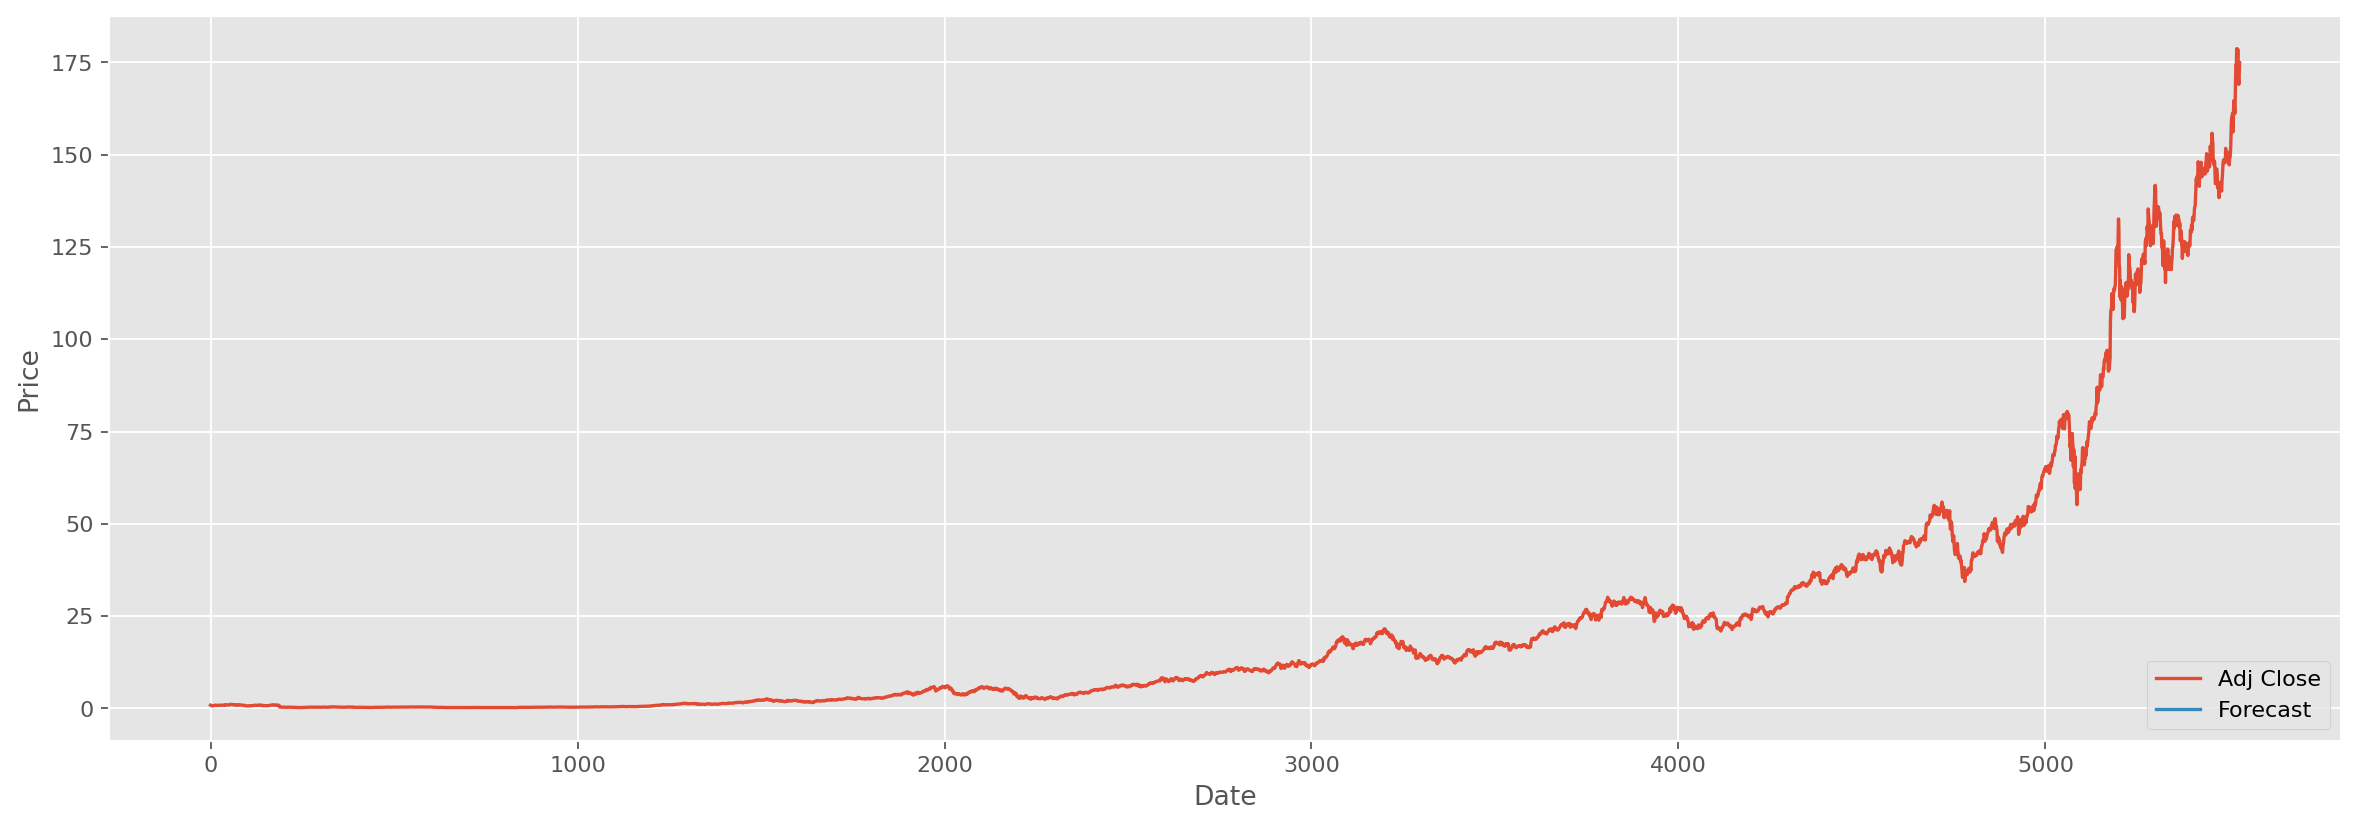

In [142]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18,6), dpi=160, facecolor='w', edgecolor='k')
df['Adj Close'].p.plot()
plt.legenlot()
df['Forecast']d(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()